# 3. Prompt engineering code

### Name: Bingfeng Hu
### CID: 01137798

I declare that the below is of my own work, and I have worked on this assignment independently. Please see the cell below for package dependencies, uncomment to install the package dependencies.

In this notebook we peforming labelling on the entire dataset of interest for training, validation, and testing. The dataset of interest are from the 3 sources we've choosen filtered for articles containing 512 tokens or less.

Here, we write code here to automatically label this data

In [3]:
import os
from openai import OpenAI

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# allow for asyncio
import asyncio
from openai import AsyncOpenAI

from dotenv import load_dotenv


# load the openai api key needed from .env to call openAI models from the API

load_dotenv()

True

In [2]:
# add seed for reproducibility

SEED = 30224

In [3]:
# load the data from notebook 2's output, with articles with 512 tokens or less

file_name = "processed_data/compiled_news_all_bert_compliant.json"

df_useful_sources_short_articles = pd.read_json(file_name)

In [4]:
df_useful_sources_short_articles.shape

(5748, 45)

In [5]:
# here we remove duplicates of news articles based on the title and text body

df_useful_sources_short_articles = df_useful_sources_short_articles.drop_duplicates(subset=["text_full"])

In [6]:
df_useful_sources_short_articles.drop_duplicates(subset=["text_full"]).shape

(5675, 45)

# Create Test set

Randomly sample the 200 in order to create our test set

In [7]:
manual_review_df = df_useful_sources_short_articles.sample(200, random_state=SEED)

manual_review_df.head()

,organizations,uuid,author,url,ord_in_thread,title,locations,highlightText,language,persons,...,thread_site_type,thread_published,thread_replies_count,thread_uuid,entities_persons,entities_locations,entities_organizations,word_count,text_full,token_count
3444,[],9f44148d3b4ecc0c6a0fe60bde1e562a31ca9cc3,,https://uk.finance.yahoo.com/news/european-sto...,0,European stocks shed more than one percent at ...,[],,english,[],...,news,2015-08-26T11:28:00.000+03:00,0,9f44148d3b4ecc0c6a0fe60bde1e562a31ca9cc3,[],[],[],355,European stocks shed more than one percent at ...,479
4728,[Samsung],07040a0690d95f08a552bbad0eecde9618b196b3,,https://uk.finance.yahoo.com/news/springer-sam...,0,"Springer, Samsung to partner in mobile media",[],,english,[],...,news,2015-09-01T11:29:00.000+03:00,0,07040a0690d95f08a552bbad0eecde9618b196b3,[],[],[],332,"Springer, Samsung to partner in mobile media\n...",427
3927,[EU],7a390e558374d68b218918f4c28aa766c13a92f2,,https://uk.finance.yahoo.com/news/labours-corb...,0,Labour's Corbyn says voted 'No' to Britain's E...,[Britain],,english,[Corbyn],...,news,2015-09-10T21:48:00.000+03:00,0,7a390e558374d68b218918f4c28aa766c13a92f2,[],[],[],229,Labour's Corbyn says voted 'No' to Britain's E...,308
4365,[],ab0359d7ee85020a4b8c99cb23df02aefb20d38f,,https://uk.finance.yahoo.com/news/u-oil-extend...,0,"U.S. oil extends gains on stock-draw, Brent mu...","[U.S., Asia]",,english,[Henning Gloystein],...,news,2015-09-16T06:17:00.000+03:00,0,ab0359d7ee85020a4b8c99cb23df02aefb20d38f,[],[],[],350,"U.S. oil extends gains on stock-draw, Brent mu...",461
359,"[Imperial Tobacco, Bloomberg Terms]",ad32f3bc1e0528d1e1734813bd39c4ed496b9f9c,,https://uk.finance.yahoo.com/news/imperial-tob...,0,Imperial Tobacco considering stake sale in Spa...,"[Spain, Logista]",,english,[],...,news,2015-07-15T21:40:00.000+03:00,0,ad32f3bc1e0528d1e1734813bd39c4ed496b9f9c,[],[],[],161,Imperial Tobacco considering stake sale in Spa...,210


In [8]:
manual_review_df.shape

(200, 45)

In [9]:
# manual_review_df.drop_duplicates(subset=["text_full"]).shape

(200, 45)

In [10]:
manual_review_df.to_json("test/manual_review_articles_bert_compliant_unlabelled.json", orient="records")

# Creating the dataset for training and validation

We then take the observations which are not in our 200 samples for the test and create a separate dataset which we will use for training and validation

In [11]:
# get the rest of the unlabelled data
unlabelled_news_articles = df_useful_sources_short_articles.drop(manual_review_df.index)
unlabelled_news_articles.shape # 5748 original size


(5475, 45)

In [12]:
unlabelled_news_articles.to_json("test/automatic_review_articles_bert_compliant_unlabelled.json", orient="records")

Next steps for labelling

Use the test folder so that you can then create the output in the final labelled data folder.

File by file, and then put everything in the combined file.

In [13]:
unlabelled_news_articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 0 to 5747
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   organizations                      5475 non-null   object
 1   uuid                               5475 non-null   object
 2   author                             5475 non-null   object
 3   url                                5475 non-null   object
 4   ord_in_thread                      5475 non-null   int64 
 5   title                              5475 non-null   object
 6   locations                          5475 non-null   object
 7   highlightText                      5475 non-null   object
 8   language                           5475 non-null   object
 9   persons                            5475 non-null   object
 10  text                               5475 non-null   object
 11  external_links                     5475 non-null   object
 12  publis

# Labelling our test, training and validation sets

In the code below, we create the code to make requests in parallel to label our unlabelled news datasets

## Make model requests

Call the model here to get useful sentiment labels for our data.

In [14]:
# edit the code here for passing the data in the form of jsons

# change the section here such that we have dictionary below instead for each completion.
openai_client = AsyncOpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

async def get_news_sentiment(semaphore: asyncio.Semaphore, record_dict: dict):
    async with semaphore:

        message = record_dict["text_full"]

        response = await openai_client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "You are a news sentiment classifier, only return values -1, 0, 1 for negative, neutral and positive sentiment. Return only values -1, 0, 1",
                },
                {
                    "role": "user",
                    "content": message,
                }
            ],
            model="gpt-4-1106-preview",
            seed=30224
        )

        # add prediction 
        record_dict["prediction"] = response.choices[0].message.content
        # return {"text": message, "prediction": response.choices[0].message.content}

        return record_dict

# change this function to include a dataframe passed in instead!!

async def main_sentiment_labelling(max_concurrent_requests: int, record_dict_lst) -> None:
    # Use semaphore to control the number of concurrent requests
    semaphore = asyncio.Semaphore(max_concurrent_requests)

    # List of messages to be sent
    # messages = ["Say this is a test", "Say hello to Arunav", "Say hello to Gerardo"]

    # gather the tasks together
    tasks = [get_news_sentiment(semaphore, record_dict) for record_dict in record_dict_lst]
    results = await asyncio.gather(*tasks)


    return list(results)



## Labelling the test set

The code below labels the test set automatically with GPT-4 by making 5 calls in parallel in batches

We then save the test set data into the `test` folder.

In [16]:
MAX_CONCURRENT_REQUESTS = 5

In [17]:
# call model requests

manual_labelled_dict = await main_sentiment_labelling(MAX_CONCURRENT_REQUESTS, manual_review_df.to_dict(orient='records'))



In [18]:
manual_labelled_dict_df = pd.DataFrame(manual_labelled_dict)

manual_labelled_dict_df.shape

(200, 46)

In [19]:
manual_labelled_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   organizations                      200 non-null    object
 1   uuid                               200 non-null    object
 2   author                             200 non-null    object
 3   url                                200 non-null    object
 4   ord_in_thread                      200 non-null    int64 
 5   title                              200 non-null    object
 6   locations                          200 non-null    object
 7   highlightText                      200 non-null    object
 8   language                           200 non-null    object
 9   persons                            200 non-null    object
 10  text                               200 non-null    object
 11  external_links                     200 non-null    object
 12  publishe

In [20]:
manual_labelled_dict_df.head()

,organizations,uuid,author,url,ord_in_thread,title,locations,highlightText,language,persons,...,thread_published,thread_replies_count,thread_uuid,entities_persons,entities_locations,entities_organizations,word_count,text_full,token_count,prediction
0,[],9f44148d3b4ecc0c6a0fe60bde1e562a31ca9cc3,,https://uk.finance.yahoo.com/news/european-sto...,0,European stocks shed more than one percent at ...,[],,english,[],...,2015-08-26T11:28:00.000+03:00,0,9f44148d3b4ecc0c6a0fe60bde1e562a31ca9cc3,[],[],[],355,European stocks shed more than one percent at ...,479,-1
1,[Samsung],07040a0690d95f08a552bbad0eecde9618b196b3,,https://uk.finance.yahoo.com/news/springer-sam...,0,"Springer, Samsung to partner in mobile media",[],,english,[],...,2015-09-01T11:29:00.000+03:00,0,07040a0690d95f08a552bbad0eecde9618b196b3,[],[],[],332,"Springer, Samsung to partner in mobile media\n...",427,1
2,[EU],7a390e558374d68b218918f4c28aa766c13a92f2,,https://uk.finance.yahoo.com/news/labours-corb...,0,Labour's Corbyn says voted 'No' to Britain's E...,[Britain],,english,[Corbyn],...,2015-09-10T21:48:00.000+03:00,0,7a390e558374d68b218918f4c28aa766c13a92f2,[],[],[],229,Labour's Corbyn says voted 'No' to Britain's E...,308,0
3,[],ab0359d7ee85020a4b8c99cb23df02aefb20d38f,,https://uk.finance.yahoo.com/news/u-oil-extend...,0,"U.S. oil extends gains on stock-draw, Brent mu...","[U.S., Asia]",,english,[Henning Gloystein],...,2015-09-16T06:17:00.000+03:00,0,ab0359d7ee85020a4b8c99cb23df02aefb20d38f,[],[],[],350,"U.S. oil extends gains on stock-draw, Brent mu...",461,0
4,"[Imperial Tobacco, Bloomberg Terms]",ad32f3bc1e0528d1e1734813bd39c4ed496b9f9c,,https://uk.finance.yahoo.com/news/imperial-tob...,0,Imperial Tobacco considering stake sale in Spa...,"[Spain, Logista]",,english,[],...,2015-07-15T21:40:00.000+03:00,0,ad32f3bc1e0528d1e1734813bd39c4ed496b9f9c,[],[],[],161,Imperial Tobacco considering stake sale in Spa...,210,0


In [21]:
# look at the breakdown of sentiments for news articles according to GPT-4

manual_labelled_dict_df["prediction"].value_counts()

0     92
1     59
-1    49
Name: prediction, dtype: int64

Next we output the results of our GPT-4 labelled test set.

In [22]:
manual_labelled_dict_df.to_json("test/manual_review_articles_bert_compliant_labelled.json", orient="records")

In [24]:
manual_labelled_dict_df.to_csv("test/manual_review_articles_bert_compliant_labelled_add_human_labels.csv", index = False)

In [5]:
# create a graph of the data 
manual_labelled_dict_df = pd.read_csv("test/manual_review_articles_bert_compliant_labelled_add_human_labels.csv")

Text(0.5, 1.0, 'Test Set Data Composition ')

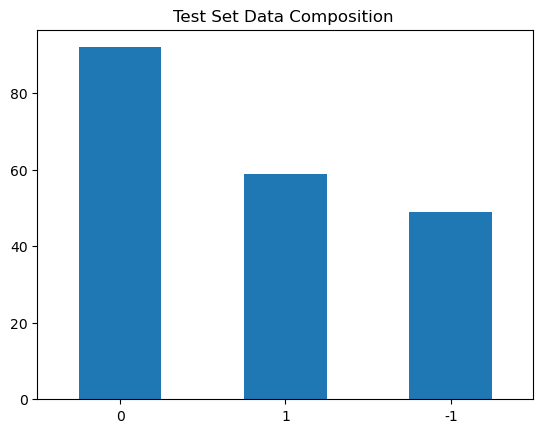

In [7]:
manual_labelled_dict_df["prediction"].value_counts().plot.bar(rot=0)
plt.title("Test Set Data Composition ")

# Labelling Training-Validation Set


Next we label our training-validation set using GPT-4. We call the OpenAI API in parallel using 5 works in batches of 200, saving each batch in a individual json

In particular, we try to avoid the limit hit of 500 requests per minute, with OpenAI declining our requests as a result

We then save these data files in the `labelled_data` folder.

In [25]:
import json

In [26]:
# get the unlabelled data first

unlabelled_news_articles.shape

(5475, 45)

In [27]:
unlabelled_news_articles.head() # data seems fine

,organizations,uuid,author,url,ord_in_thread,title,locations,highlightText,language,persons,...,thread_site_type,thread_published,thread_replies_count,thread_uuid,entities_persons,entities_locations,entities_organizations,word_count,text_full,token_count
0,[],a89e7019628a2389a579c60eefb374e9306d1778,Reuters,http://www.reuters.com/article/2015/07/29/anad...,0,Anadarko not interested in selling down Mozamb...,[],,english,[],...,news,2015-07-29T18:33:00.000+03:00,0,a89e7019628a2389a579c60eefb374e9306d1778,[],[],[],90,Anadarko not interested in selling down Mozamb...,123
1,[],1a6be71bd6645447e7e5672573507168c017da25,Reuters,http://www.reuters.com/article/2015/07/29/euro...,0,"Greek debt restructuring is inevitable, says I...",[],,english,[],...,news,2015-07-29T19:08:00.000+03:00,0,1a6be71bd6645447e7e5672573507168c017da25,[],[],[],264,"Greek debt restructuring is inevitable, says I...",348
2,[],16580551a1f07ca293ff47d84a1cb3b33cc96256,Reuters,http://www.reuters.com/article/2015/07/29/braz...,0,Brazil says remains committed with fiscal aust...,[],,english,[],...,news,2015-07-29T05:02:00.000+03:00,0,16580551a1f07ca293ff47d84a1cb3b33cc96256,[],[],[],100,Brazil says remains committed with fiscal aust...,124
3,[],3f27c785332566ca97d5b5d21a473d1cfab72ea0,Reuters,http://www.reuters.com/article/2015/07/28/chev...,0,"Chevron to lay off 1,500 workers amidst oil pr...",[],,english,[],...,news,2015-07-29T02:20:00.000+03:00,0,3f27c785332566ca97d5b5d21a473d1cfab72ea0,[],[],[],214,"Chevron to lay off 1,500 workers amidst oil pr...",274
4,[],971eceeefb1350eb7e03c05e88013d60e6dbb47b,Katie Linsell,http://www.bloomberg.com/news/articles/2015-07...,0,Junk Bondholders Weigh Emerging-Market Exit Fr...,[],,english,[],...,news,2015-07-28T20:55:00.000+03:00,0,971eceeefb1350eb7e03c05e88013d60e6dbb47b,[],[],[],371,Junk Bondholders Weigh Emerging-Market Exit Fr...,481


In [31]:
def batch_records(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

In [32]:
def save_news_batch_as_json(data, batch_index, folder='labelled_data'):
    os.makedirs(folder, exist_ok=True)
    file_path = os.path.join(folder, f'labelled_news_batch_{batch_index}.json')
    with open(file_path, 'w') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [33]:
async def process_news_batches(list_of_dicts: list[dict], batch_size: int = 200):
    batched_data = list(batch_records(list_of_dicts, batch_size))
    for index, batch in enumerate(batched_data):
    
        # continue where previous code stoped
        # if index <= 20:

        #     continue

        results = await main_sentiment_labelling(MAX_CONCURRENT_REQUESTS, batch)  # Assuming 5 concurrent requests
        save_news_batch_as_json(results, index)

        if index % 10 == 0:

            print("Batch no: ", index, " completed")

# asyncio.run(process_batches())


In [34]:
unlabelled_news_articles_dict = unlabelled_news_articles.to_dict(orient="records")

In [35]:
# run the result on the jupyter notebook

await process_news_batches(unlabelled_news_articles_dict)

Batch no:  0  completed
Batch no:  10  completed
Batch no:  20  completed


## Running Performance

It takes around 16 minutes to run it, labelling much shorter than your own time.

100 articles labelling for 30 minutes or more. (40 minutes - to check this.)

Total budget - $20.24 dollars check the 29th December cost!!

In [ ]:
# https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file

# Concatenate all files in the labelled_data folder

Here we concatenate all files in the labelled_data folder together to review the labelled data contents

In [36]:
folder_path = "labelled_data"


# Store all dataframes in a list
dataframes = []

# iterate over each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and load the JSON file
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            
            # flatten the JSON data and convert to DataFrame
            df = pd.json_normalize(json_data, sep='_')
            dataframes.append(df)

#concatenate all dataframes into a single one
labelled_news_df = pd.concat(dataframes, ignore_index=True)


In [37]:
labelled_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   organizations                      5475 non-null   object
 1   uuid                               5475 non-null   object
 2   author                             5475 non-null   object
 3   url                                5475 non-null   object
 4   ord_in_thread                      5475 non-null   int64 
 5   title                              5475 non-null   object
 6   locations                          5475 non-null   object
 7   highlightText                      5475 non-null   object
 8   language                           5475 non-null   object
 9   persons                            5475 non-null   object
 10  text                               5475 non-null   object
 11  external_links                     5475 non-null   object
 12  publis

In [38]:
labelled_news_df.shape

(5475, 46)

In [39]:
labelled_news_df["prediction"].value_counts()

0     2210
-1    1950
1     1315
Name: prediction, dtype: int64